In [52]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import ascii
import numpy as np

In [53]:
# Downloaded from http://stev.oapd.inaf.it/cgi-bin/cmd_3.0
# Padova isochrones, Leo Girardi et al.
iso = ascii.read('data/isochrones.dat')
print(iso)

 col1      col2         col3      col4  col5  ... col28  col29  col30  col31 
----- ------------- ------------ ----- ------ ... ------ ------ ------ ------
0.015     3980000.0 0.0900000036  0.09 -1.674 ...  9.382  6.957  6.344  6.001
0.015     3980000.0 0.0911359787 0.091  -1.67 ...  9.385  6.919  6.307  5.967
0.015     3980000.0 0.1049539819 0.105 -1.615 ...  9.144  6.748  6.166  5.832
0.015     3980000.0 0.1131614596 0.113 -1.582 ...  8.981   6.67  6.106  5.773
0.015     3980000.0 0.1206720099 0.121 -1.564 ...  8.888  6.631  6.078  5.744
0.015     3980000.0 0.1286364198 0.129 -1.525 ...  8.706   6.54  6.005  5.674
0.015     3980000.0 0.1365841329 0.137 -1.496 ...  8.594  6.473  5.937  5.614
0.015     3980000.0 0.1427436173 0.143 -1.476 ...   8.51  6.426  5.889  5.572
0.015     3980000.0 0.1509342343 0.151 -1.441 ...  8.372  6.343  5.802  5.497
0.015     3980000.0 0.1589486748 0.159 -1.415 ...  8.269  6.283   5.74  5.443
  ...           ...          ...   ...    ... ...    ...    ... 

In [54]:
age = iso['col2']/1E6 #in millions of years
logL = iso['col5']; logT = iso['col6']

In [74]:
maxT = logT.max()
print(maxT)
minT = logT.min()
print(minT)
logtmax = 10**logT.max()
print(logtmax)
wantmax = np.log(30000)
print(wantmax)
print(np.log(6000))

5.3439
3.3238
220749.63796691355
10.308952660644293
8.699514748210191


In [56]:
maxL = logL.max()
print(maxL)
minL = logL.min()
print(minL)
loglmax = 10**logL.max()
print(loglmax)
loglmin = 10**logL.min()
print(loglmin)

wantminl = np.log(10000)
print(wantminl)
wantmaxl = np.log(0.0001)
print(wantmaxl)

6.018
-9.999
1042317.4293933036
1.0023052380778984e-10
9.210340371976184
-9.210340371976182


In [57]:
#print(sorted(set(age))) #run this to check available ages
k_y1 = (age == 5.01) & (10**logL > 0.001)
k_y2 = (age == 20.0) & (10**logL > 0.001)
k_y3 = (age == 100.0) & (10**logL > 0.001)
k_o1 = (age == 1000.0) & (10**logL > 0.001)
k_o2 = (age == 10000.0) & (10**logL > 0.001)

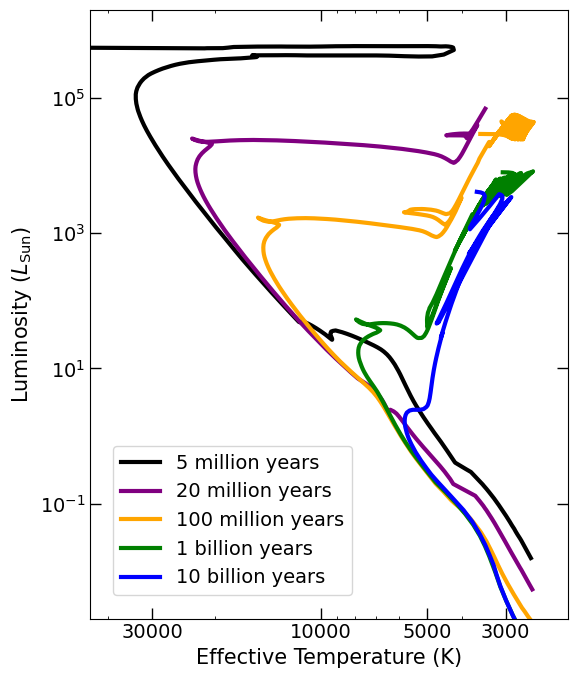

In [58]:
plt.rc("font", family='serif', serif='Ubuntu', monospace='Ubuntu Mono', \
               size=14)
plt.rc("axes", labelsize=15, titlesize=12)
plt.rc("xtick", top=True, direction='in', labelsize=14)
plt.rc("xtick.major", size=8, width=1)
plt.rc("ytick", right=True, direction='in', labelsize=14)
plt.rc("ytick.major", size=8, width=1)
plt.rc("lines", markersize=10, markeredgewidth=2)
plt.rc("lines", linewidth=3)

ig1, ax1 = plt.subplots(figsize=(6, 7))

ax1.plot(10**logT[k_y1], 10**logL[k_y1], label='5 million years', color="black")
ax1.plot(10**logT[k_y2], 10**logL[k_y2], label='20 million years', color="purple")
ax1.plot(10**logT[k_y3], 10**logL[k_y3], label='100 million years', color="orange")
ax1.plot(10**logT[k_o1], 10**logL[k_o1], label='1 billion years', color="green")
ax1.plot(10**logT[k_o2], 10**logL[k_o2], label='10 billion years', color="blue")

ax1.set_xlim(45000, 2000)
ax1.set_ylim(2E-3, 2E6)

ax1.set_xscale('log')
ax1.set_xticks([3000, 5000, 10000, 30000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.set_yscale('log')

ax1.set_xlabel('Effective Temperature (K)')
ax1.set_ylabel('Luminosity ($L_\mathrm{Sun}$)')
ax1.legend(borderaxespad=1.2)

plt.tight_layout()

#plt.savefig('figures/isochrones.png')

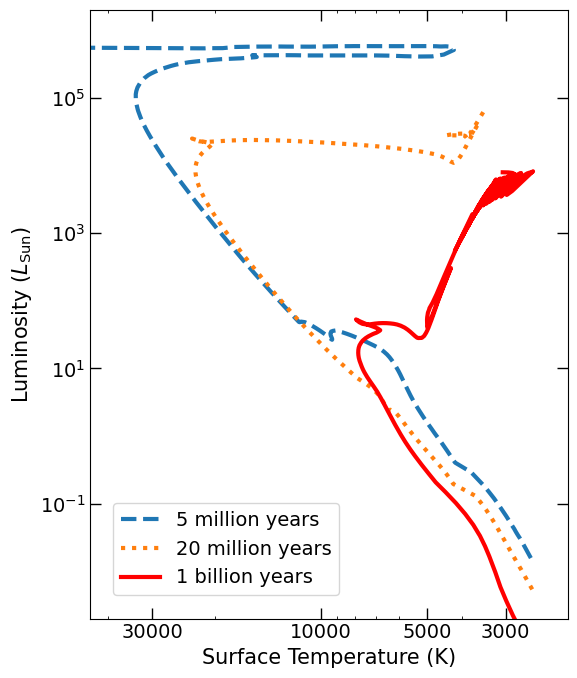

In [60]:
ig1, ax1 = plt.subplots(figsize=(6, 7))

ax1.plot(10**logT[k_y1], 10**logL[k_y1], label='5 million years', ls='--')
ax1.plot(10**logT[k_y2], 10**logL[k_y2], label='20 million years', ls=':')
ax1.plot(10**logT[k_o1], 10**logL[k_o1], label='1 billion years', color='red')

ax1.set_xlim(45000, 2000)
ax1.set_ylim(2E-3, 2E6)

ax1.set_xscale('log')
ax1.set_xticks([3000, 5000, 10000, 30000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.set_yscale('log')

ax1.set_xlabel('Surface Temperature (K)')
ax1.set_ylabel('Luminosity ($L_\mathrm{Sun}$)')
ax1.legend(borderaxespad=1.2)

plt.tight_layout()

#plt.savefig('figures/isochrones_bw.png')

Text(0, 0.5, 'Luminosity ($L_\\mathrm{Sun}$)')

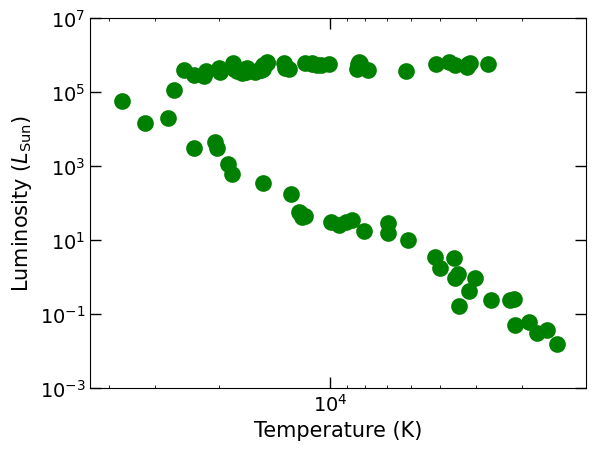

In [61]:
#tests to create stars from model

k = np.random.randint(0, sum(k_y1), 100)
t1, l1 = 10**logT[k_y1][k]*np.random.normal(1.0, 0.1, len(k)), 10**logL[k_y1][k]*np.random.normal(1.0, 0.1, len(k))

plt.plot(t1, l1, 'go')
plt.gca().invert_xaxis()
plt.loglog()
plt.xlim(45000, 2000)
plt.ylim(1E-3, 1E7)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity ($L_\mathrm{Sun}$)')

In [62]:
###### Manipulate data to create new dataframe ######
import pandas as pd

In [63]:
initial_data = pd.read_csv('data/isochrones.csv')
initial_data

,Zini,Age,Mini,Mass,logL,logTe,logg,label,McoreTP,C_O,...,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag,Unnamed: 31
0,0.015,3.98E+06,0.090000004,0.09,-1.674,3.4149,3.678,0,0,0.463,...,8.955,14.689,14.509,13.453,11.507,9.382,6.957,6.344,6.001,NaN
1,0.015,3.98E+06,0.091135979,0.091,-1.67,3.4153,3.681,0,0,0.463,...,8.944,14.833,14.574,13.51,11.544,9.385,6.919,6.307,5.967,NaN
2,0.015,3.98E+06,0.104953982,0.105,-1.615,3.4208,3.709,0,0,0.463,...,8.808,14.766,14.305,13.198,11.298,9.144,6.748,6.166,5.832,NaN
3,0.015,3.98E+06,0.11316146,0.113,-1.582,3.4241,3.722,0,0,0.463,...,8.724,14.555,14.058,12.936,11.098,8.981,6.67,6.106,5.773,NaN
4,0.015,3.98E+06,0.12067201,0.121,-1.564,3.4258,3.739,0,0,0.463,...,8.68,14.474,13.927,12.779,10.98,8.888,6.631,6.078,5.744,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29409,0.015,1.26E+10,0.97297895,0.574,3.466,3.5288,-0.201,8,0.529,0.48,...,-3.894,2.57,0.845,-0.778,-2.288,-3.994,-5.694,-6.576,-6.877,NaN
29410,0.015,1.26E+10,0.972979248,0.562,3.494,3.5354,-0.212,8,0.529,0.48,...,-3.965,2.428,0.521,-1.169,-2.58,-4.158,-5.746,-6.613,-6.906,NaN
29411,0.015,1.26E+10,0.972979546,0.549,3.498,3.5466,-0.182,8,0.53,0.48,...,-3.976,2.254,0.092,-1.684,-2.941,-4.299,-5.725,-6.568,-6.845,NaN
29412,0.015,1.26E+10,0.972979903,0.535,3.494,3.5605,-0.133,8,0.53,0.48,...,-3.964,2.052,-0.309,-2.145,-3.27,-4.383,-5.677,-6.484,-6.742,NaN


In [64]:
data = initial_data[["Age", "Mass", "logL", "logTe", "logg", "Mloss"]]
print(data.dtypes)

Age      object
Mass     object
logL     object
logTe    object
logg     object
Mloss    object
dtype: object


In [65]:
data = data.astype(float) 
  
print() 
  
# lets find out the data type after changing 
print(data.dtypes) 
  
# print dataframe.  
data

ValueError: could not convert string to float: 'Zini'

In [ ]:
data.loc[~(data==0).all(axis=1)]
data
#data['logTe'] = np.exp(data['logTe'])
#data

In [ ]:
data['logTe'] = np.exp(data['logTe'])
data